## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  31.880068  1033.462457  0.208211   3.173506  1.452315
1  73.432170   353.112608  0.138539  10.291451  0.705153
2  59.586490  1230.820171  0.679007  10.659773  1.541042
3  49.792131  1535.248197  0.921339   4.035190  1.393387
4  20.357106  1659.385227  0.112862  10.432241  1.565382


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9648157	total: 66ms	remaining: 1m 5s
1:	learn: 0.9563860	total: 66.9ms	remaining: 33.4s
2:	learn: 0.9441128	total: 67.7ms	remaining: 22.5s
3:	learn: 0.9317416	total: 70.6ms	remaining: 17.6s
4:	learn: 0.9220356	total: 71.6ms	remaining: 14.3s
5:	learn: 0.9120749	total: 72.9ms	remaining: 12.1s
6:	learn: 0.9017136	total: 75.9ms	remaining: 10.8s
7:	learn: 0.8921899	total: 76.7ms	remaining: 9.51s
8:	learn: 0.8823278	total: 77.4ms	remaining: 8.52s
9:	learn: 0.8706101	total: 78ms	remaining: 7.72s
10:	learn: 0.8610545	total: 78.6ms	remaining: 7.06s
11:	learn: 0.8497877	total: 79.1ms	remaining: 6.51s
12:	learn: 0.8424481	total: 79.9ms	remaining: 6.06s
13:	learn: 0.8324326	total: 80.5ms	remaining: 5.67s
14:	learn: 0.8229419	total: 81.1ms	remaining: 5.33s
15:	learn: 0.8137407	total: 81.6ms	remaining: 5.01s
16:	learn: 0.8034390	total: 82ms	remaining: 4.74s
17:	learn: 0.7940568	total: 82.6ms	remaining: 4.51s
18:	learn: 0.7863052	total: 83.3ms	remaining: 4.3s

126:	learn: 0.3002521	total: 148ms	remaining: 1.02s
127:	learn: 0.2981772	total: 149ms	remaining: 1.01s
128:	learn: 0.2956633	total: 149ms	remaining: 1.01s
129:	learn: 0.2935376	total: 150ms	remaining: 1s
130:	learn: 0.2912952	total: 150ms	remaining: 995ms
131:	learn: 0.2891904	total: 151ms	remaining: 990ms
132:	learn: 0.2875058	total: 151ms	remaining: 984ms
133:	learn: 0.2863102	total: 151ms	remaining: 978ms
134:	learn: 0.2848988	total: 152ms	remaining: 972ms
135:	learn: 0.2826436	total: 152ms	remaining: 967ms
136:	learn: 0.2810389	total: 153ms	remaining: 962ms
137:	learn: 0.2791812	total: 153ms	remaining: 956ms
138:	learn: 0.2773836	total: 154ms	remaining: 951ms
139:	learn: 0.2751210	total: 154ms	remaining: 946ms
140:	learn: 0.2727202	total: 154ms	remaining: 941ms
141:	learn: 0.2707556	total: 155ms	remaining: 936ms
142:	learn: 0.2684685	total: 155ms	remaining: 930ms
143:	learn: 0.2667826	total: 156ms	remaining: 925ms
144:	learn: 0.2651229	total: 156ms	remaining: 920ms
145:	learn: 0.2

350:	learn: 0.1023366	total: 288ms	remaining: 532ms
351:	learn: 0.1016380	total: 288ms	remaining: 531ms
352:	learn: 0.1009536	total: 289ms	remaining: 529ms
353:	learn: 0.1006202	total: 289ms	remaining: 527ms
354:	learn: 0.0999436	total: 289ms	remaining: 526ms
355:	learn: 0.0994031	total: 290ms	remaining: 524ms
356:	learn: 0.0988261	total: 290ms	remaining: 523ms
357:	learn: 0.0981758	total: 291ms	remaining: 521ms
358:	learn: 0.0978275	total: 295ms	remaining: 528ms
359:	learn: 0.0976332	total: 296ms	remaining: 526ms
360:	learn: 0.0970763	total: 296ms	remaining: 525ms
361:	learn: 0.0968865	total: 297ms	remaining: 523ms
362:	learn: 0.0965469	total: 297ms	remaining: 522ms
363:	learn: 0.0960267	total: 298ms	remaining: 520ms
364:	learn: 0.0954105	total: 298ms	remaining: 519ms
365:	learn: 0.0952272	total: 298ms	remaining: 517ms
366:	learn: 0.0947225	total: 299ms	remaining: 516ms
367:	learn: 0.0943603	total: 299ms	remaining: 514ms
368:	learn: 0.0938595	total: 300ms	remaining: 513ms
369:	learn: 

624:	learn: 0.0400968	total: 433ms	remaining: 260ms
625:	learn: 0.0399239	total: 434ms	remaining: 260ms
626:	learn: 0.0398428	total: 435ms	remaining: 259ms
627:	learn: 0.0397002	total: 436ms	remaining: 258ms
628:	learn: 0.0395497	total: 437ms	remaining: 258ms
629:	learn: 0.0394705	total: 437ms	remaining: 257ms
630:	learn: 0.0393435	total: 438ms	remaining: 256ms
631:	learn: 0.0391626	total: 438ms	remaining: 255ms
632:	learn: 0.0390864	total: 438ms	remaining: 254ms
633:	learn: 0.0389645	total: 439ms	remaining: 253ms
634:	learn: 0.0388969	total: 439ms	remaining: 253ms
635:	learn: 0.0387617	total: 440ms	remaining: 252ms
636:	learn: 0.0386495	total: 441ms	remaining: 251ms
637:	learn: 0.0385826	total: 441ms	remaining: 251ms
638:	learn: 0.0385166	total: 443ms	remaining: 250ms
639:	learn: 0.0383995	total: 444ms	remaining: 250ms
640:	learn: 0.0383409	total: 444ms	remaining: 249ms
641:	learn: 0.0382015	total: 445ms	remaining: 248ms
642:	learn: 0.0381254	total: 445ms	remaining: 247ms
643:	learn: 

871:	learn: 0.0266149	total: 575ms	remaining: 84.4ms
872:	learn: 0.0265724	total: 575ms	remaining: 83.7ms
873:	learn: 0.0265659	total: 576ms	remaining: 83ms
874:	learn: 0.0265473	total: 576ms	remaining: 82.3ms
875:	learn: 0.0265409	total: 577ms	remaining: 81.6ms
876:	learn: 0.0264951	total: 577ms	remaining: 80.9ms
877:	learn: 0.0264822	total: 578ms	remaining: 80.3ms
878:	learn: 0.0263203	total: 579ms	remaining: 79.6ms
879:	learn: 0.0263140	total: 579ms	remaining: 79ms
880:	learn: 0.0261543	total: 579ms	remaining: 78.3ms
881:	learn: 0.0261098	total: 580ms	remaining: 77.6ms
882:	learn: 0.0260971	total: 580ms	remaining: 76.9ms
883:	learn: 0.0259401	total: 581ms	remaining: 76.2ms
884:	learn: 0.0259343	total: 581ms	remaining: 75.5ms
885:	learn: 0.0258874	total: 583ms	remaining: 75ms
886:	learn: 0.0257329	total: 584ms	remaining: 74.4ms
887:	learn: 0.0255807	total: 585ms	remaining: 73.7ms
888:	learn: 0.0255749	total: 585ms	remaining: 73.1ms
889:	learn: 0.0255685	total: 586ms	remaining: 72.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.31040552491129186


ABC Pre-generator MAE 0.7854777941269465


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

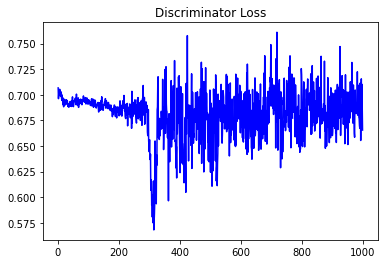

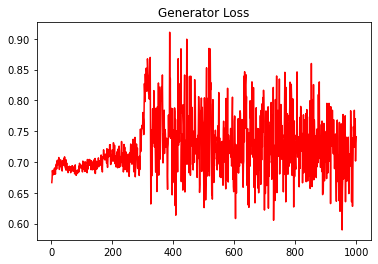

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.7821315713226795


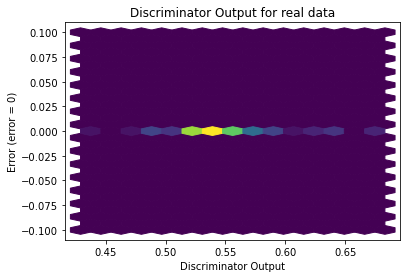

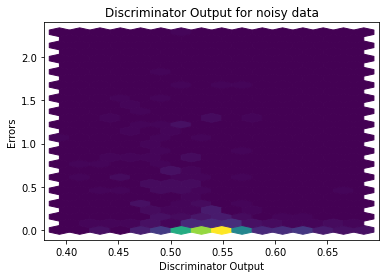

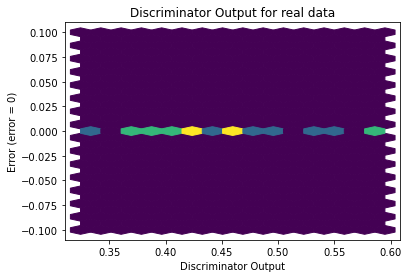

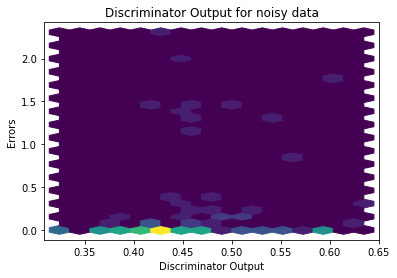

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

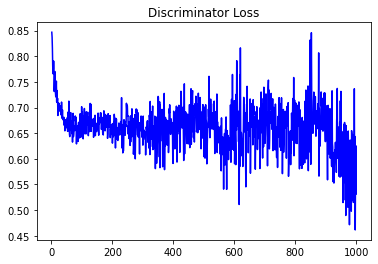

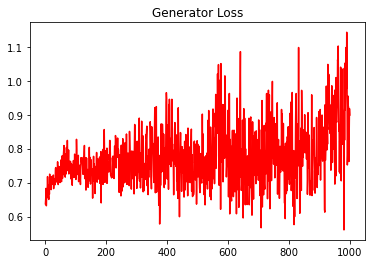

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.7987421907885001


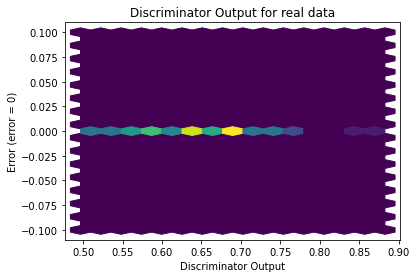

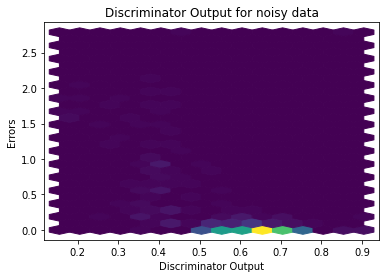

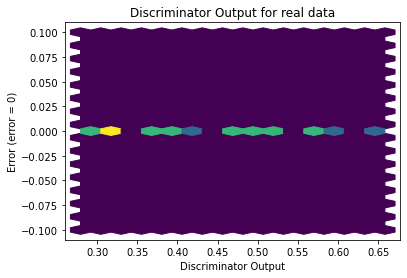

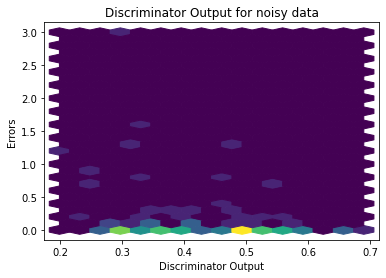

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


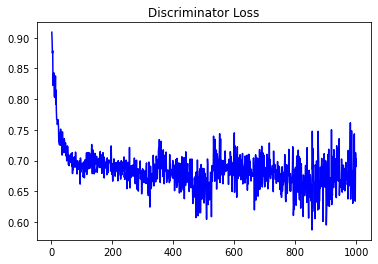

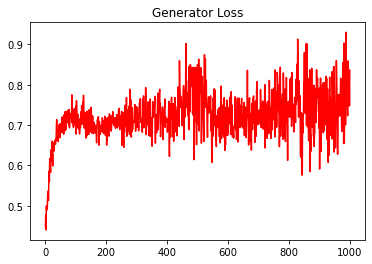

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
8.343304950363935


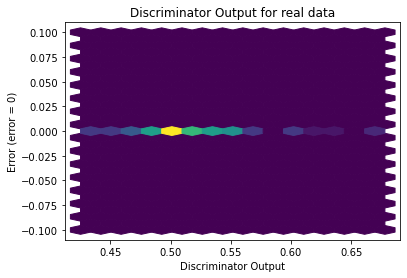

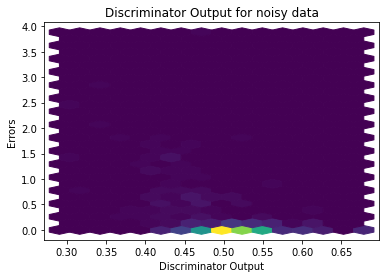

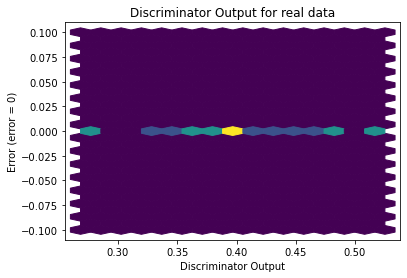

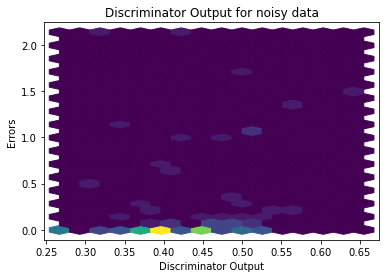

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


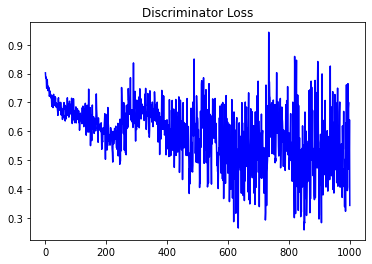

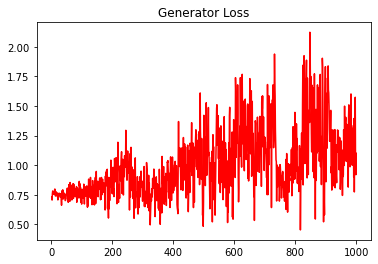

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
1.1149249681616202


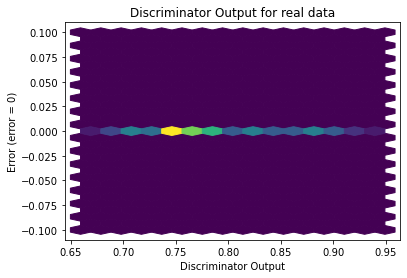

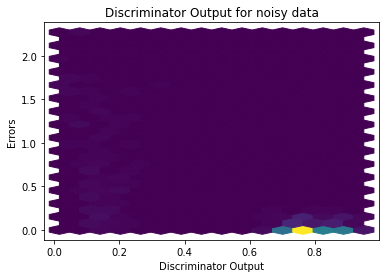

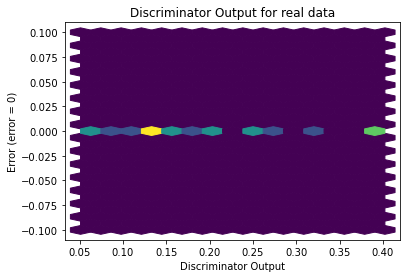

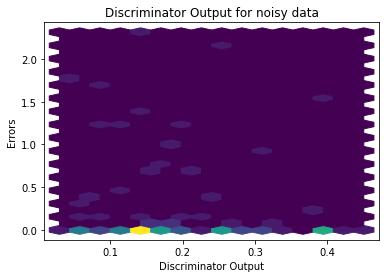

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1363]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3891]], requires_grad=True)
